# Modelo de previsão dos melhores da temporada de 2023 na Champions League 2023
## Projeto de Inteligência Artificial
Projeto: [GitHub](https://github.com/Zosin0/prediction-uefa/)
*   Lucas Zoser Nunes Costa - 22105593
*   Leonardo Areias Rodovalho - 22101570
*   Leonardo Benttes Almeida Placido dos Santos - 22103833
*   Pedro Henrique Moreira da Silva - 22201914

## Definição de problema:

O objetivo do nosso projeto é criar um modelo de Machine Learning para prever o número de gols que um jogador fará com base em seus dados estatísticos. Assim, esse modelo será treinado com uma base que contém estatisticas de jogadores da UEFA Champions de 2021/2022.




#### Importação de bibliotecas



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Extração de dados


In [ ]:
attempts = pd.read_csv("https://raw.githubusercontent.com/Zosin0/prediction-uefa/main/players-data/attempts.csv", sep = ",")
key_stats = pd.read_csv("https://raw.githubusercontent.com/Zosin0/prediction-uefa/main/players-data/key_stats.csv", sep = ",")

###Informações como: minutos jogados, partidas jogadas, gols, assistências, distância percorrida

In [ ]:
key_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_name       747 non-null    object
 1   club              747 non-null    object
 2   position          747 non-null    object
 3   minutes_played    747 non-null    int64 
 4   match_played      747 non-null    int64 
 5   goals             747 non-null    int64 
 6   assists           747 non-null    int64 
 7   distance_covered  747 non-null    object
dtypes: int64(4), object(4)
memory usage: 46.8+ KB


###Informações como: posição, total de tentativas, tentativas no gol, fora do gol, defendidas, partidas jogadas

In [ ]:
attempts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   serial          546 non-null    int64 
 1   player_name     546 non-null    object
 2   club            546 non-null    object
 3   position        546 non-null    object
 4   total_attempts  546 non-null    int64 
 5   on_target       546 non-null    int64 
 6   off_target      546 non-null    int64 
 7   blocked         546 non-null    int64 
 8   match_played    546 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 38.5+ KB


###Dataframe com as principais colunas

In [ ]:
df = pd.merge(key_stats, attempts[['player_name', 'total_attempts', 'on_target', 'off_target', 'blocked']], on='player_name')
df.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,total_attempts,on_target,off_target,blocked
0,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,27,8,10,9
1,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,45,23,13,9
2,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,14,5,3,6
3,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,9,4,5,0
4,Alaba,Real Madrid,Defender,1040,12,1,0,112.3,5,1,1,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 0 to 567
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_name       568 non-null    object
 1   club              568 non-null    object
 2   position          568 non-null    object
 3   minutes_played    568 non-null    int64 
 4   match_played      568 non-null    int64 
 5   goals             568 non-null    int64 
 6   assists           568 non-null    int64 
 7   distance_covered  568 non-null    object
 8   total_attempts    568 non-null    int64 
 9   on_target         568 non-null    int64 
 10  off_target        568 non-null    int64 
 11  blocked           568 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 57.7+ KB


## Análise de dados:


<ipython-input-7-4b06c9c467ee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


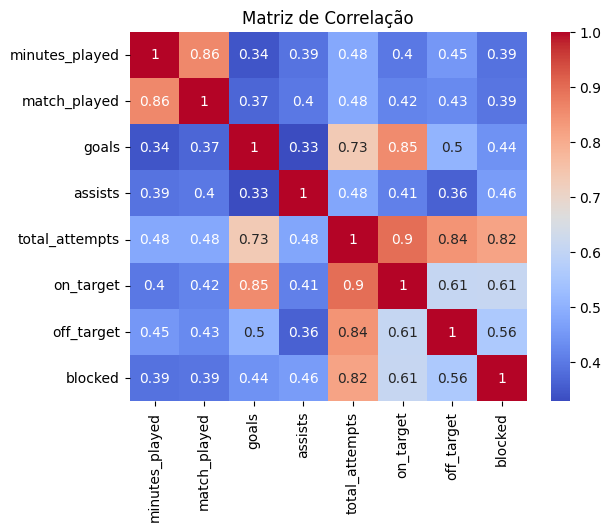

In [ ]:
# Matriz de Correlação
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

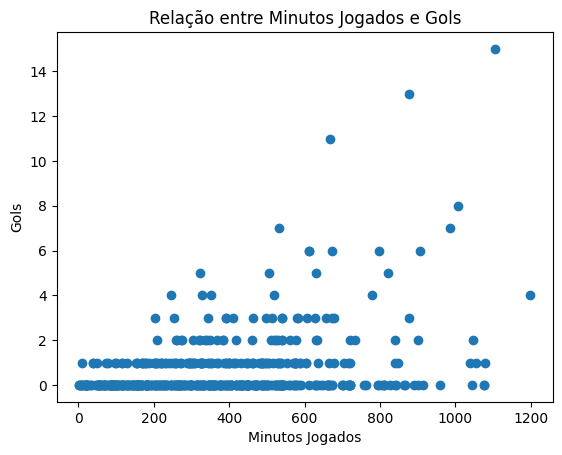

In [ ]:
# Scatter Plot
plt.scatter(df['minutes_played'], df['goals'])
plt.xlabel('Minutos Jogados')
plt.ylabel('Gols')
plt.title('Relação entre Minutos Jogados e Gols')
plt.show()

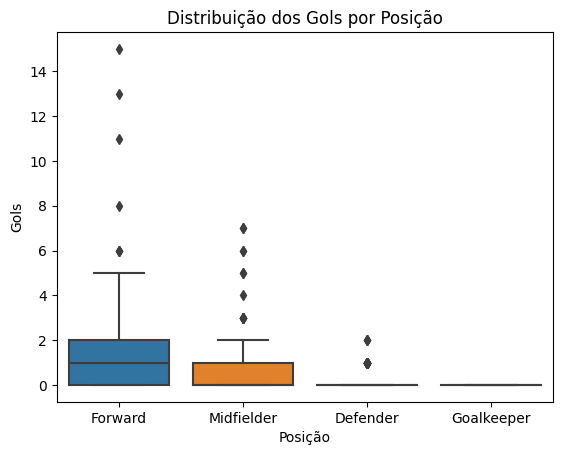

In [ ]:
# Box Plot
sns.boxplot(x=df['position'], y=df['goals'])
plt.xlabel('Posição')
plt.ylabel('Gols')
plt.title('Distribuição dos Gols por Posição')
plt.show()

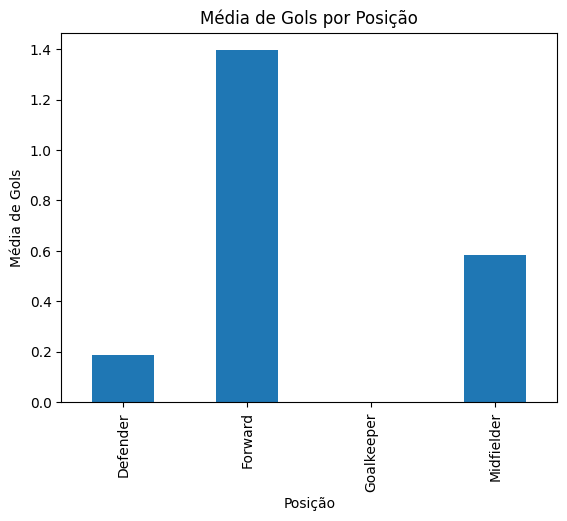

In [ ]:
# Exemplo de gráfico de barras para a média dos gols por posição
mean_goals_by_position = df.groupby('position')['goals'].mean()
mean_goals_by_position.plot(kind='bar')
plt.xlabel('Posição')
plt.ylabel('Média de Gols')
plt.title('Média de Gols por Posição')
plt.show()

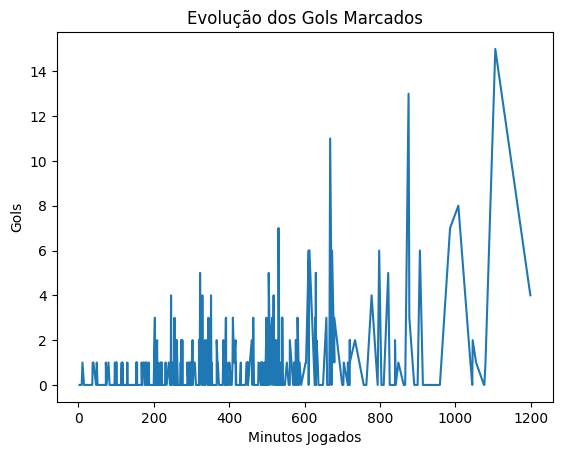

In [ ]:
# Exemplo de gráfico de linha para a evolução dos gols marcados ao longo do tempo
df_sorted = df.sort_values('minutes_played')  # Ordenar os dados por minutos jogados
plt.plot(df_sorted['minutes_played'], df_sorted['goals'])
plt.xlabel('Minutos Jogados')
plt.ylabel('Gols')
plt.title('Evolução dos Gols Marcados')
plt.show()

In [ ]:
df_filtered = df.sample(n = 20, random_state = 1)
df_filtered

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,total_attempts,on_target,off_target,blocked
479,Matheus Cunha,Atlético,Forward,142,5,0,0,18.3,4,0,2,2
90,Koke,Atlético,Midfielder,665,9,0,1,91.2,3,0,2,1
132,Vanaken,Club Brugge,Midfielder,540,6,3,1,69.4,12,6,1,5
165,Lo Celso,Villarreal,Midfielder,524,6,0,0,68.4,5,0,3,2
526,Kanga,Young Boys,Forward,75,5,0,0,10.1,2,0,1,1
360,Rafael Leão,Milan,Forward,294,4,1,1,32.4,1,1,0,0
247,Kanté,Chelsea,Midfielder,427,6,0,1,52.2,3,0,2,1
446,Bürgy,Young Boys,Defender,180,2,0,0,21.4,1,1,0,0
180,Čolak,Malmö,Forward,500,6,0,0,63,7,1,5,1
516,Lustenberger,Young Boys,Defender,90,1,0,0,10.2,1,0,1,0


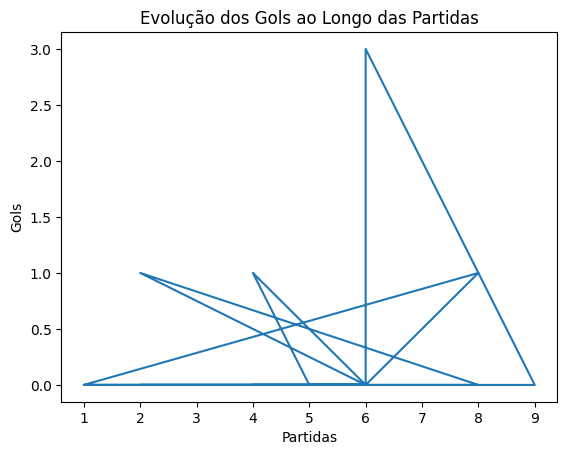

In [ ]:
# Gráfico de linha para a evolução dos gols ao longo das partidas
plt.plot(df_filtered['match_played'], df_filtered['goals'])
plt.xlabel('Partidas')
plt.ylabel('Gols')
plt.title('Evolução dos Gols ao Longo das Partidas')
plt.show()

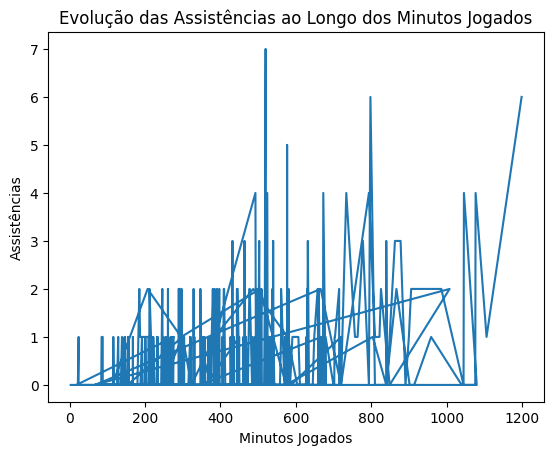

In [ ]:
# Gráfico de linha para a evolução das assistências ao longo dos minutos jogados
plt.plot(df['minutes_played'], df['assists'])
plt.xlabel('Minutos Jogados')
plt.ylabel('Assistências')
plt.title('Evolução das Assistências ao Longo dos Minutos Jogados')
plt.show()

## Pré-processamento dos dados:


player_name         0
club                0
position            0
minutes_played      0
match_played        0
goals               0
assists             0
distance_covered    0
total_attempts      0
on_target           0
off_target          0
blocked             0
dtype: int64


<ipython-input-15-e1334b841a73>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


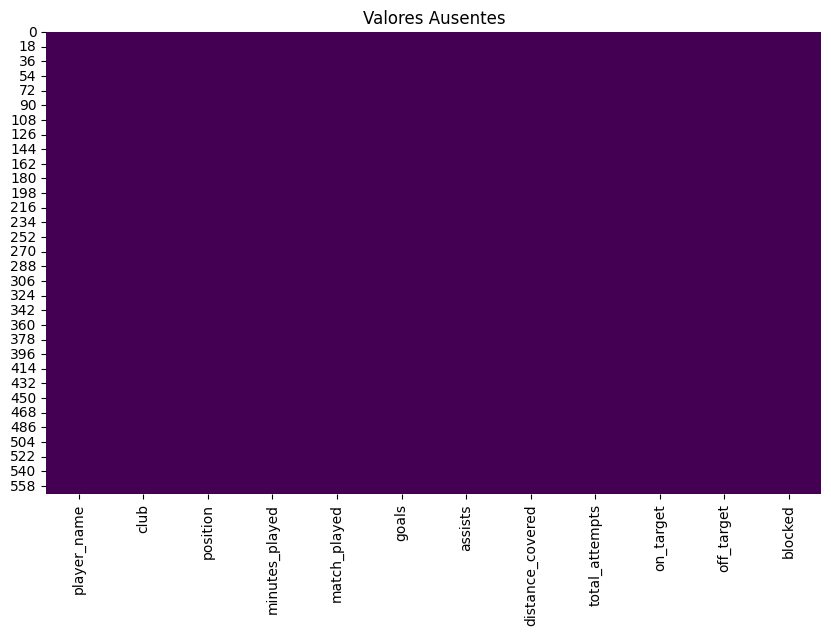

In [ ]:
# Verificar valores ausentes
print(df.isnull().sum())

# Preencher valores ausentes com a média
df.fillna(df.mean(), inplace=True)

# Criar o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Ausentes')
plt.show()

In [ ]:
# Codificação one-hot para variáveis categóricas
df_encoded = pd.get_dummies(df, columns=['position'], drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

# Separar variáveis de entrada (X) e variável alvo (y)
X = df_encoded.drop('goals', axis=1)
y = df_encoded['goals']

# Dividir o dataset em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




## Construção do modelo


In [ ]:
correlations = df.corr()
print(correlations['goals'].sort_values(ascending=False))

goals             1.000000
on_target         0.854641
total_attempts    0.734311
off_target        0.504576
blocked           0.438580
match_played      0.368386
minutes_played    0.343051
assists           0.328184
Name: goals, dtype: float64


<ipython-input-18-c6023ee92002>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


In [ ]:
from sklearn.linear_model import LinearRegression

features = ['total_attempts','on_target','off_target']
X_train_selected = X_train[features]
X_test_selected = X_test[features]

In [ ]:
# Criar uma instância do modelo de regressão linear
model = LinearRegression()

In [ ]:
# Treinar o modelo com as colunas selecionadas
model.fit(X_train_selected, y_train)

LinearRegression()

In [ ]:
model.coef_

array([-0.10681025,  0.58794296,  0.126025  ])

## Teste com estatísticas da UEFA de 2023

In [119]:
jogador = [[35, 18, 7]]
previsao = model.predict(jogador)

if previsao - int(previsao) >= 0.5:
  print(int(previsao) + 1)

else:
  print(int(previsao))

8


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Métrica desejada


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test_selected)

# Avaliar o desempenho do modelo
r2 = r2_score(y_test, y_pred)
'''
Coeficiente de determinação:
Métrica que varia de 0 a 1, sendo 1 um bom ajuste do modelo de dado.
O R2 mede a proporção da variancia nos dados de saida que é capturada pro modelo.
'''
mse = mean_squared_error(y_test, y_pred)
'''
Erro Quadrático Médio:
Calcula a média dos quadrados das diferenças entre as previsões do modelo e os
valores reais, é bom para destacar grandes erros. Diferença de aprox 59%
'''
mae = mean_absolute_error(y_test, y_pred)
'''
Erro Médio Absoluto: Calcula a média das diferenças absolutas
entre as previsões do modelo e os valores reais.
Quanto menor o valor do MAE, melhor o desempenho do modelo e termos de precisão.
Diferença de aprox 53%
'''

print('Mean Absolute Error (MAE):', mae)
print('Coeficiente de Determinação (R²):', r2)
print('Erro Quadrático Médio (MSE):', mse)

Mean Absolute Error (MAE): 0.526954336475902
Coeficiente de Determinação (R²): 0.7326607801373959
Erro Quadrático Médio (MSE): 0.589662129347783


## Previsão e Conclusões do modelo

